In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### 1. Dada la siguiente tabla de datos:

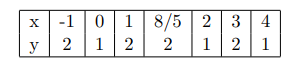

Utilizar “a mano” el metodo de k-medias para agrupar los datos en 2 clusters.

- (a) Comenzando con b1 = (1, 2) y b2 = (3, 2)
- (b) Comenzando con b1 = (0, 1) y b2 = (3, 2)

¿Se obtiene la misma clasificaci´on? ¿Alguna de las clasificaciones obtenidas le parece m´as
apropiada?

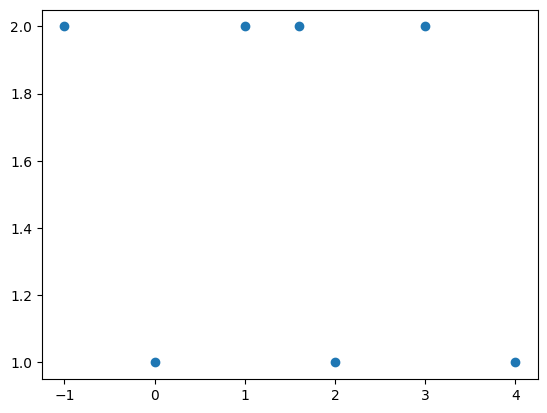

In [3]:
x = [-1,0,1,8/5,2,3,4]
y = [2,1,2,2,1,2,1]

plt.scatter(x,y)
plt.show()

Centroides finales para el caso (a):
[[0.4  1.75]
 [3.5  1.5 ]]
Etiquetas de clusters para el caso (a):
[0 0 0 0 1 1]


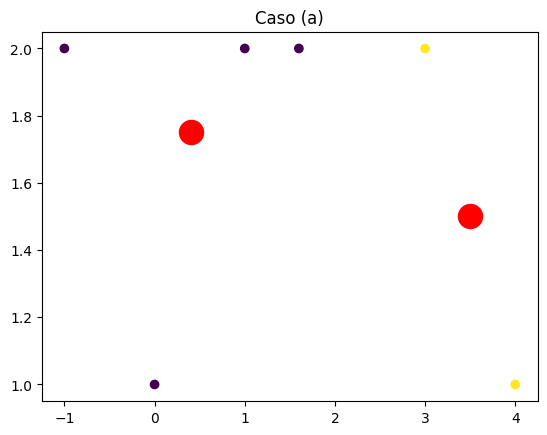

In [17]:
# Datos
data = np.array([[-1, 2], [0, 1], [1, 2], [8/5, 2], [3, 2], [4, 1]])

# Inicialización de centroides
centroids_a = np.array([[1, 2], [3, 2]])

def k_means(data, centroids, iterations=10):
    for _ in range(iterations):
        # Asignación de clusters
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroids = np.argmin(distances, axis=0)
        
        # Recalcular centroides
        new_centroids = np.array([data[closest_centroids == k].mean(axis=0) for k in range(centroids.shape[0])])
        
        # Si los centroides no cambian, romper el bucle
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, closest_centroids

centroids_a_final, labels_a = k_means(data, centroids_a)

print("Centroides finales para el caso (a):")
print(centroids_a_final)
print("Etiquetas de clusters para el caso (a):")
print(labels_a)

# Visualización del resultado
plt.scatter(data[:, 0], data[:, 1], c=labels_a, cmap='viridis')
plt.scatter(centroids_a_final[:, 0], centroids_a_final[:, 1], s=300, c='red')
plt.title('Caso (a)')
plt.show()


Centroides finales para el caso (b):
[[0.         1.66666667]
 [2.86666667 1.66666667]]
Etiquetas de clusters para el caso (b):
[0 0 0 1 1 1]


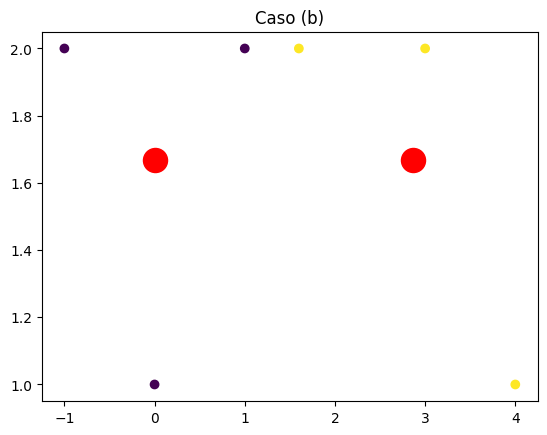

In [18]:
# Inicialización de centroides
centroids_b = np.array([[0, 1], [3, 2]])

centroids_b_final, labels_b = k_means(data, centroids_b)

print("Centroides finales para el caso (b):")
print(centroids_b_final)
print("Etiquetas de clusters para el caso (b):")
print(labels_b)

# Visualización del resultado
plt.scatter(data[:, 0], data[:, 1], c=labels_b, cmap='viridis')
plt.scatter(centroids_b_final[:, 0], centroids_b_final[:, 1], s=300, c='red')
plt.title('Caso (b)')
plt.show()


### 2. Considere los datasetets p7-data1.csv y p7-data2.csv de datos artificialmente generados
#### (a) Abra cada dataset en Python y genere un diagrama de dispersión (scatter plot) para cada uno

In [19]:
p7_data1 = pd.read_csv('../_src/Datasets/p7-data1.csv')
p7_data2 = pd.read_csv('../_src/Datasets/p7-data2.csv')

print(f"Columnas de p7_data1: {p7_data1.columns}")
print(f"Columnas de p7_data2: {p7_data2.columns}")

Columnas de p7_data1: Index(['x', 'y'], dtype='object')
Columnas de p7_data2: Index(['x', 'y'], dtype='object')


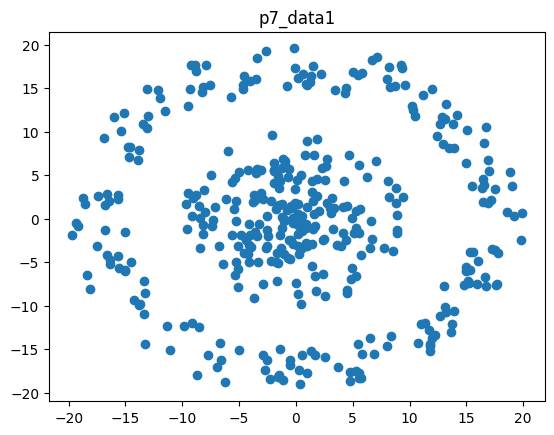

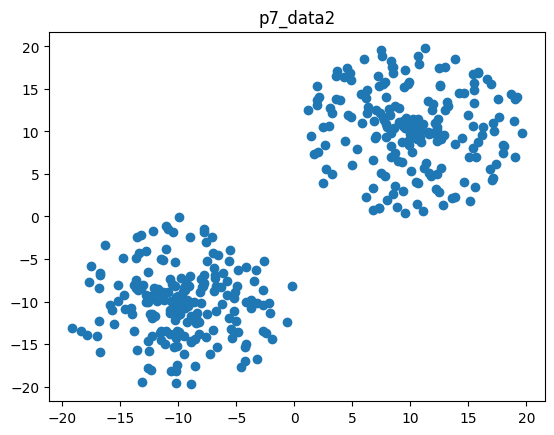

In [20]:
# Visualización de los datos
plt.scatter(p7_data1['x'], p7_data1['y'])
plt.title('p7_data1')
plt.show()

plt.scatter(p7_data2['x'], p7_data2['y'])
plt.title('p7_data2')
plt.show()

#### (b) Analizando los gr´aficos “a mano” considere cuantos clusters estan presentes

`RTA:` Tanto en data 1 como en data 2 hay 2 cluster 


#### (c) Pruebe ejecutar el comando `KMeans` con la cantidad de clusters que detecto. Analizar el comportamiento del procedimiento en cada caso

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


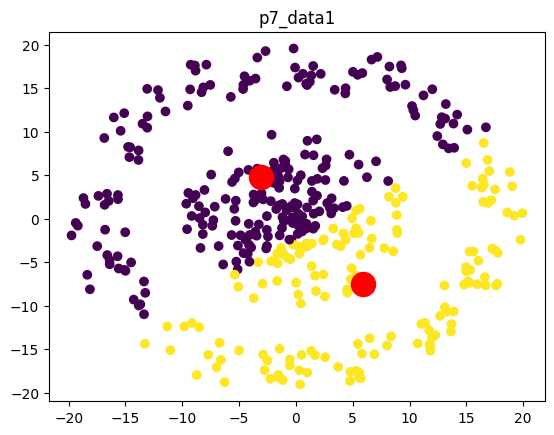

In [21]:
# Ejecutamos Kmeans en p7_data1 y p7_data2
kmeans = KMeans(n_clusters=2)
kmeans.fit(p7_data1)
labels_data1 = kmeans.labels_
centroids_data1 = kmeans.cluster_centers_

# Graficamos los resultados de p7_data1
plt.scatter(p7_data1['x'], p7_data1['y'], c=labels_data1, cmap='viridis')
plt.scatter(centroids_data1[:, 0], centroids_data1[:, 1], s=300, c='red')
plt.title('p7_data1')
plt.show()

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


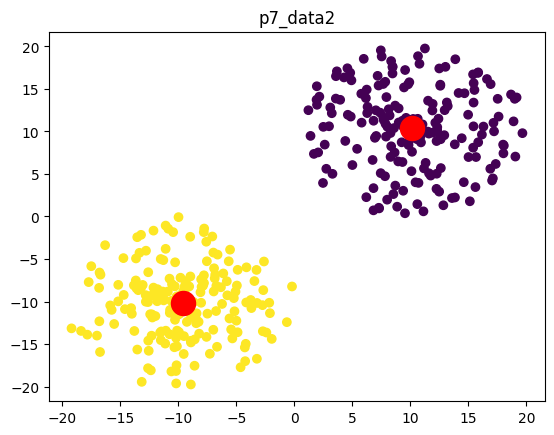

In [22]:
# Ahora lo mismo para p7_data2
kmeans = KMeans(n_clusters=2)
kmeans.fit(p7_data2)
labels_data2 = kmeans.labels_
centroids_data2 = kmeans.cluster_centers_

# Graficamos los resultados de p7_data2
plt.scatter(p7_data2['x'], p7_data2['y'], c=labels_data2, cmap='viridis')
plt.scatter(centroids_data2[:, 0], centroids_data2[:, 1], s=300, c='red')
plt.title('p7_data2')
plt.show()


#### 3. Considerar el dataset `p7-iris.txt` (para leer el archivo, observar que los datos estan separados por tabulaciones). En este ejercicio trataremos de identificar las distintas subespecies.

- (a) Cargue el archivo p7-iris.txt.
- (b) Grafique en un diagrama de dispersi´on la longitud del p´etalo vs el ancho del p´etalo.

In [24]:
# Notemos que p7-iris.txt es un archivo de texto que estan separados por tabulaciones
p7_iris = pd.read_csv('../_src/Datasets/p7-iris.txt', sep='\t')
p7_iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


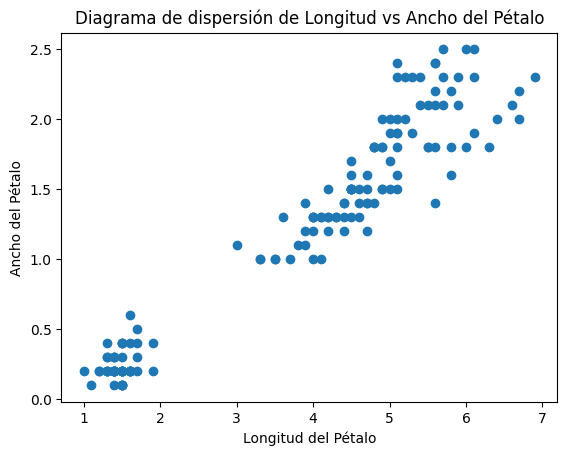

In [25]:
# Graficamos diagrama de dispersion de LongPetalo vs AnchoPetalo
plt.scatter(p7_iris['LongPetalo'], p7_iris['AnchoPetalo'])
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión de Longitud vs Ancho del Pétalo')
plt.show()

#### (c) Efectue un clustering k-medias con el comando `KMeans` de los datos basados en las cuatro columnas de datos, considere k = 3 clusters
#### (d) Repita el inciso b) coloreando en funcion del índice de cluster obtenido

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


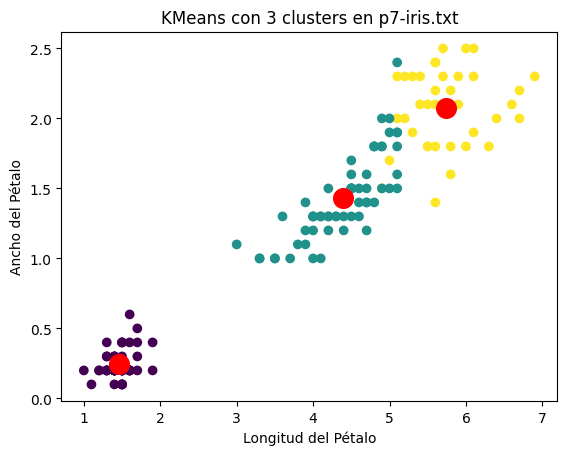

In [28]:
# Hacemos kmeans con 3 clusters de los datos basados en las cuatro columnas
kmeans = KMeans(n_clusters=3)
kmeans.fit(p7_iris)
labels_iris = kmeans.labels_
centroids_iris = kmeans.cluster_centers_

# Graficamos los resultados
plt.scatter(p7_iris['LongPetalo'], p7_iris['AnchoPetalo'], c=labels_iris, cmap='viridis')
plt.scatter(centroids_iris[:, 2], centroids_iris[:, 3], s=200, c='red')
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('KMeans con 3 clusters en p7-iris.txt')
plt.show()

#### (e) Evalue el error de clustering en funcion de la siguiente formula (within-cluster sum of squares, WCSS):

\begin{equation}
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
\end{equation}

#### donde $C_i$ representa el cluster i-ésimo y $\mu_i$ es el centroide de dicho cluster, definido como

\begin{equation}
\mu_i = \frac{1}{\#C_i} \sum_{x \in C_i} x.
\end{equation}


In [30]:
# Evaluamos el error de KMeans en p7-iris.txt con 3 clusters usando la función wcss
wcss = kmeans.inertia_
print(f"Error de KMeans en p7-iris.txt con 3 clusters: {wcss}")

Error de KMeans en p7-iris.txt con 3 clusters: 78.94084142614601


#### (f) Repita el ensayo para distintos valores de k, entre 1 y 10, graficando el `WCSS` para cada valor de k. Analizar el mejor valor de k posible teniendo en cuenta un compromiso entre “complejidad” (es decir, cantidad de clusters) y nivel de error (es decir, el WCSS).

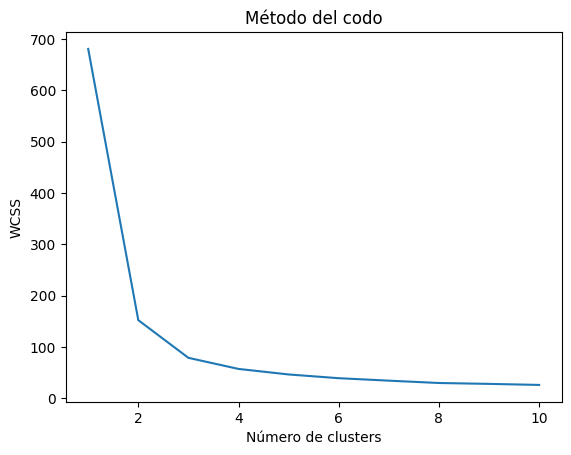

In [33]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(p7_iris)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


##### El "codo" parece estar alrededor de 3 clusters. Hasta 3 clusters, el WCSS baja mucho, pero después de 3 clusters, la reducción en WCSS ya no es tan notable.

### 4. Consideremos el dataset de datos artificiales p7-dataSinEscalar.csv

- (a) Cargar los datos y grafıcarlos.
- (b) A priori y mirando el grafico, determine la cantidad de clusters que puede detectar en los mismos e imagine inicialmente c´omo debieran ser esos clusters.

In [34]:
dataSinEscalar = pd.read_csv('../_src/Datasets/p7-dataSinEscalar.csv')
dataSinEscalar.head()

,x,y
0,0.002501,6488.26703
1,-0.026980,2521.94722
2,-0.029001,3068.77291
3,0.007030,4314.27482
4,-0.025356,2384.49945


In [36]:
dataSinEscalar.columns

Index(['x', ' y'], dtype='object')

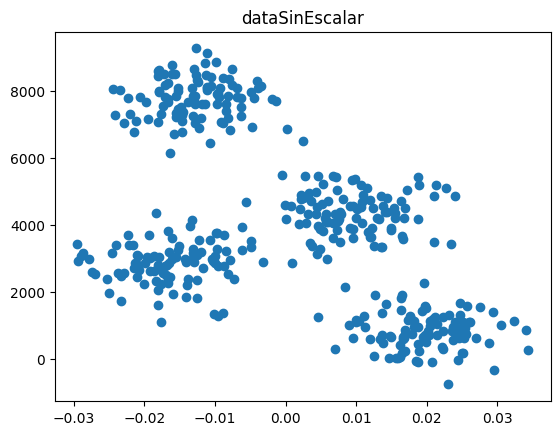

In [37]:
# Graficamos
plt.scatter(dataSinEscalar['x'], dataSinEscalar[' y'])
plt.title('dataSinEscalar')
plt.show()

Parece ser 4 clusters

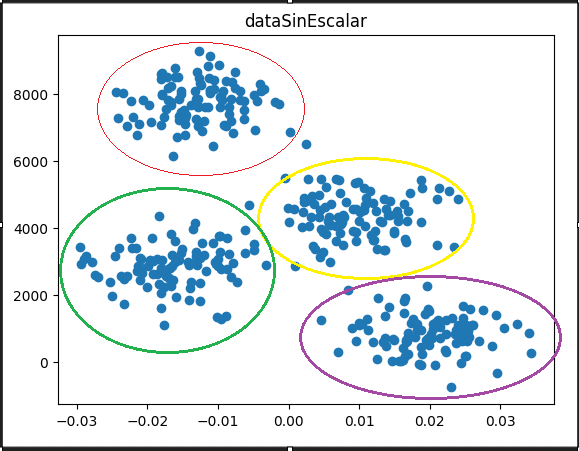

#### (c) Realizar un clustering k-medias con el valor de k antes determinado.
#### (d) ¿Considera satisfactorio el clustering obtenido? ¿Representa lo que usted esperaba?

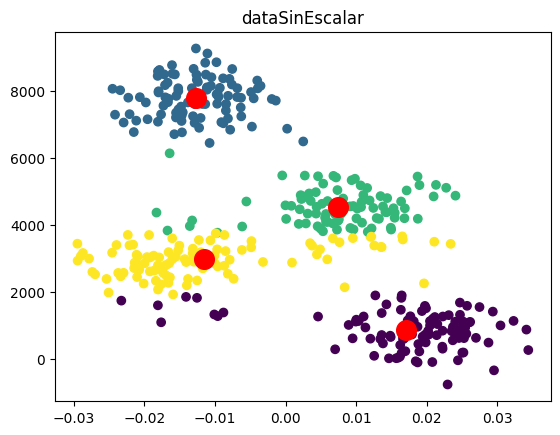

In [44]:
# Hacemos kmeans con 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataSinEscalar)
labels_dataSinEscalar = kmeans.labels_
centroids_dataSinEscalar = kmeans.cluster_centers_

# Graficamos los resultados
plt.scatter(dataSinEscalar['x'], dataSinEscalar[' y'], c=labels_dataSinEscalar, cmap='viridis')
plt.scatter(centroids_dataSinEscalar[:, 0], centroids_dataSinEscalar[:, 1], s=200, c='red')
plt.title('dataSinEscalar')
plt.show()

No parece muy bien hecho. El amarillo siguio de largo. 

#### (e) Uno de los problemas que tenemos es que el metodo de k-medias es muy sensible a las diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las variables de forma tal que todas se muevan en el mismo rango. 

#### Por ejemplo, podemos conseguir eso efectuando una normalizacion como sigue: 
$$
X_{ij} = \frac{X_{ij} - \min(X_{.j})}{\max(X_{.j}) - \min(X_{.j})}
$$

#### De esta manera, logramos que los datos de cada columna caigan entre 0 y 1. Normalice los datos siguiendo este criterio

In [47]:
# Reescalamos las variables usando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataEscalar = scaler.fit_transform(dataSinEscalar)

dataEscalar

array([[5.00874339e-01, 7.23260642e-01],
       [3.92513227e-02, 3.27807082e-01],
       [7.60695866e-03, 3.82327185e-01],
       [5.71789890e-01, 5.06507329e-01],
       [6.46732726e-02, 3.14103141e-01],
       [1.95055509e-01, 8.54583563e-01],
       [8.09842904e-01, 1.59989785e-01],
       [4.62959727e-01, 4.92735203e-01],
       [1.81363732e-01, 3.78130931e-01],
       [7.38479184e-01, 2.02972222e-01],
       [3.13051385e-01, 8.56012815e-01],
       [8.56191846e-01, 9.50395166e-02],
       [8.27834706e-01, 4.18459016e-01],
       [8.67221413e-02, 4.15158163e-01],
       [3.37704675e-01, 3.71162756e-01],
       [9.67304466e-01, 1.89197371e-01],
       [1.78575752e-01, 2.35588912e-01],
       [7.15935656e-01, 1.17226660e-01],
       [6.52388453e-01, 4.64495167e-01],
       [2.69478947e-01, 4.29974464e-01],
       [2.95100994e-01, 4.28865769e-01],
       [1.37246576e-01, 3.41899534e-01],
       [1.55618606e-01, 7.89371159e-01],
       [6.30247078e-01, 5.43450378e-01],
       [5.894085

#### (f) Vuelva a correr el procedimiento de clustering, tome las etiquetas de clustering obtenidos y grafique los datos originales con un color que dependa del clustering obtenido con los datos escalados.

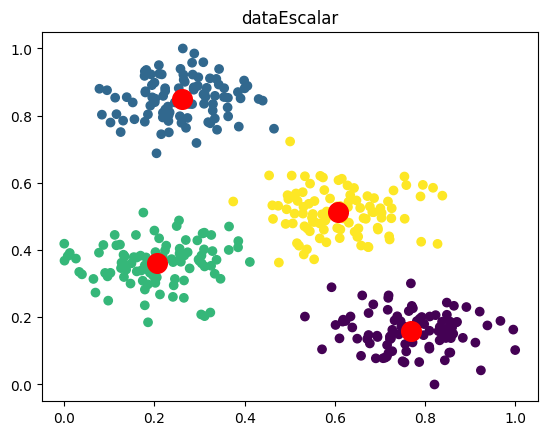

In [48]:
# Convertimos a DataFrame
dataEscalar = pd.DataFrame(dataEscalar, columns=['x', 'y'])

# Volvemos a hacer kmeans con 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataEscalar)
labels_dataEscalar = kmeans.labels_
centroids_dataEscalar = kmeans.cluster_centers_

# Graficamos los resultados
plt.scatter(dataEscalar['x'], dataEscalar['y'], c=labels_dataEscalar, cmap='viridis')
plt.scatter(centroids_dataEscalar[:, 0], centroids_dataEscalar[:, 1], s=200, c='red')
plt.title('dataEscalar')
plt.show()

## Clasificación

### 6. Implementar un clasificador de k-NN que prediga el sexo de los pinguinos utilizando como variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares) y evaluar el error de prediccion en cada caso. ¿Como elegirıa el valor de k optimo?